In [569]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Завантаження попередньо підготовлених датасетів**

In [2]:
path_users = './data/Normalized_dataset_users.csv'
path_features = './data/Normalized_dataset_features.csv'
path_user_profiles = './data/User_Profiles.csv'
path_user_profiles_KMEANS = './data/User_Profiles_clusterized.csv'
path_user_profiles_Hierarchical = './data/User_Profiles_hierarchical_clusterized.csv'

In [3]:
df_users = pd.read_csv(path_users, on_bad_lines='skip')
df_users.shape

(9711301, 4)

In [4]:
df_features = pd.read_csv(path_features, on_bad_lines='skip')
df_features.shape

(50683, 18)

In [5]:
df_profiles = pd.read_csv(path_user_profiles, on_bad_lines='skip', index_col='Unnamed: 0')
df_profiles.shape

(1000, 12)

In [6]:
df_profiles.sample()

danceability    energy       key  \
47ad5453f648a25824be91e9c49635d614491d6d      0.516858  0.663739  0.477377   

                                          loudness      mode  speechiness  \
47ad5453f648a25824be91e9c49635d614491d6d  0.814205  0.593607     0.064869   

                                          acousticness  instrumentalness  \
47ad5453f648a25824be91e9c49635d614491d6d      0.243181          0.239327   

                                          liveness   valence     tempo  \
47ad5453f648a25824be91e9c49635d614491d6d  0.193198  0.507963  0.503275   

                                          time_signature  
47ad5453f648a25824be91e9c49635d614491d6d        0.775342

додамо до датафрейму користувачів дані про їх кластер

In [7]:
df_kmeans = pd.read_csv(path_user_profiles_KMEANS, on_bad_lines='skip', index_col='user_id')

In [8]:
df_profiles['cluster_kmeans'] = df_kmeans['cluster_k_5']

In [41]:
df_users = df_users.merge(df_kmeans[['cluster_k_5']], left_on='user_id', right_index=True, how='inner')

In [46]:
df_users.columns = ['track_id', 'user_id', 'playcount', 'playcount_norm', 'cluster_kmeans']

In [9]:
df_hier = pd.read_csv(path_user_profiles_Hierarchical, on_bad_lines='skip', index_col='user_id')

In [10]:
df_profiles['cluster_hierarchical'] = df_hier['cluster']

In [47]:
df_users = df_users.merge(df_hier[['cluster']], left_on='user_id', right_index=True, how='inner')

In [49]:
df_users.columns = ['track_id', 'user_id', 'playcount', 'playcount_norm', 'cluster_kmeans',
       'cluster_hierarchical']

In [11]:
df_profiles.sample()

danceability    energy       key  \
0c8b60137b17bbaec561436fb97aafb3a188f41a      0.477125  0.683658  0.472616   

                                          loudness      mode  speechiness  \
0c8b60137b17bbaec561436fb97aafb3a188f41a  0.811708  0.391437     0.067854   

                                          acousticness  instrumentalness  \
0c8b60137b17bbaec561436fb97aafb3a188f41a       0.15715          0.362109   

                                          liveness   valence     tempo  \
0c8b60137b17bbaec561436fb97aafb3a188f41a  0.234654  0.313218  0.483602   

                                          time_signature  cluster_kmeans  \
0c8b60137b17bbaec561436fb97aafb3a188f41a          0.7737               4   

                                          cluster_hierarchical  
0c8b60137b17bbaec561436fb97aafb3a188f41a                     0

In [12]:
df_profiles['cluster_kmeans'].unique(), df_profiles['cluster_hierarchical'].unique()

(array([2, 3, 1, 4, 0], dtype=int64), array([1, 2, 0, 3], dtype=int64))

# **Рекомендації вручну**

## оберемо користувача

In [50]:
random_user_id = df_users.sample()['user_id'].values[0]
random_user_id

'4de2f6e29d16e9b2e25963f033fbceed655d3ca8'

## створимо матрицю користувач-трек

In [51]:
df_users.duplicated(subset=['track_id', 'user_id']).sum()

0

In [52]:
df_users.sample()

track_id                                   user_id  \
7381351  TRVRKWD128F147DF68  0167130264b1fb95133ff4b9453338c6f640fa65   

         playcount  playcount_norm  cluster_kmeans  cluster_hierarchical  
7381351          1             0.0               1                     1

In [54]:
df_users['track_id'].shape, df_users['user_id'].shape

((180628,), (180628,))

In [361]:
user_track_matrix= pd.pivot_table(
    data=df_users,
    columns='track_id',
    index='user_id',
    values='playcount',
    fill_value=0
)

In [362]:
user_track_matrix.sample()

track_id                                  TRAAAED128E0783FAB  \
user_id                                                        
b600dbbfb8ad5ce6f65b51b249d721720c28e837                 0.0   

track_id                                  TRAABJS128F9325C99  \
user_id                                                        
b600dbbfb8ad5ce6f65b51b249d721720c28e837                 0.0   

track_id                                  TRAACKM12903CE5BE9  \
user_id                                                        
b600dbbfb8ad5ce6f65b51b249d721720c28e837                 0.0   

track_id                                  TRAACPH12903CF5F14  \
user_id                                                        
b600dbbfb8ad5ce6f65b51b249d721720c28e837                 0.0   

track_id                                  TRAACZN128F93236B1  \
user_id                                                        
b600dbbfb8ad5ce6f65b51b249d721720c28e837                 0.0   

track_id                                  TRAACZR12903CDD291  \
user_id                                                        
b600dbbfb8ad5ce6f65b51b249d721720c28e837                 0.0   

track_id                                  TRAADCQ128F932EC14  \
user_id                                                        
b600dbbfb8ad5ce6f65b51b249d721720c28e837                 0.0   

track_id                                  TRAADNN128F42B1D94  \
user_id                                                        
b600dbbfb8ad5ce6f65b51b249d721720c28e837                 0.0   

track_id                                  TRAADQW128F427CE68  \
user_id                                                        
b600dbbfb8ad5ce6f65b51b249d721720c28e837                 0.0   

track_id                                  TRAADQX128F422B4CF  ...  \
user_id                                                       ...   
b600dbbfb8ad5ce6f65b51b249d721720c28e837                 0.0  ...   

track_id                                  TRZZSQU128F92FCDE8  \
user_id                                                        
b600dbbfb8ad5ce6f65b51b249d721720c28e837                 0.0   

track_id                                  TRZZUBQ128F9351D51  \
user_id                                                        
b600dbbfb8ad5ce6f65b51b249d721720c28e837                 0.0   

track_id                                  TRZZUTD12903CADD68  \
user_id                                                        
b600dbbfb8ad5ce6f65b51b249d721720c28e837                 0.0   

track_id                                  TRZZXJT128F931D72C  \
user_id                                                        
b600dbbfb8ad5ce6f65b51b249d721720c28e837                 0.0   

track_id                                  TRZZXOQ128F932A083  \
user_id                                                        
b600dbbfb8ad5ce6f65b51b249d721720c28e837                 0.0   

track_id                                  TRZZXVN128F93285B4  \
user_id                                                        
b600dbbfb8ad5ce6f65b51b249d721720c28e837                 0.0   

track_id                                  TRZZYMU128E0792400  \
user_id                                                        
b600dbbfb8ad5ce6f65b51b249d721720c28e837                 0.0   

track_id                                  TRZZZCN128F9317A03  \
user_id                                                        
b600dbbfb8ad5ce6f65b51b249d721720c28e837                 0.0   

track_id                                  TRZZZHL128F9329CFB  \
user_id                                                        
b600dbbfb8ad5ce6f65b51b249d721720c28e837                 0.0   

track_id                                  TRZZZRJ128F42819AF  
user_id                                                       
b600dbbfb8ad5ce6f65b51b249d721720c28e837                 1.0  

[1 rows x 17347 columns]

## Обчислення схожості між користувачами

In [278]:
from sklearn.metrics.pairwise import cosine_similarity

In [279]:
user_similarity_cossine = cosine_similarity(user_track_matrix)

user_similarity_df = pd.DataFrame(user_similarity, index=user_track_matrix.index, columns=user_track_matrix.index)

In [280]:
user_similarity_df.sample()

user_id                                   001889ee41b5f31c404a1abe4af07b2377fa776b  \
user_id                                                                              
181302207b8c8c2360c166e3421546217c7fcd90                                  0.019083   

user_id                                   002b63a7e2247de6d62bc62f253474edc7dd044c  \
user_id                                                                              
181302207b8c8c2360c166e3421546217c7fcd90                                   0.06854   

user_id                                   0037cbbc2cd55e2ba6d6839b15175522339aadec  \
user_id                                                                              
181302207b8c8c2360c166e3421546217c7fcd90                                  0.123224   

user_id                                   005a475315cd3a29638cf242c4b7c71194e81642  \
user_id                                                                              
181302207b8c8c2360c166e3421546217c7fcd90                                  0.021202   

user_id                                   00a55d1ba6f63109c208dbd80570520d5d80f563  \
user_id                                                                              
181302207b8c8c2360c166e3421546217c7fcd90                                  0.004778   

user_id                                   00b9144fc8cd453b81c362b30dbf8b8266eec220  \
user_id                                                                              
181302207b8c8c2360c166e3421546217c7fcd90                                  0.259599   

user_id                                   00c5d0454084e350fce790e87b4db8f2a9925d6d  \
user_id                                                                              
181302207b8c8c2360c166e3421546217c7fcd90                                       0.0   

user_id                                   00d7dede8a10a03ea0b2d4a08449a9776d414923  \
user_id                                                                              
181302207b8c8c2360c166e3421546217c7fcd90                                  0.213409   

user_id                                   012c1e24e2b24416a3a50a88ad749259666e946a  \
user_id                                                                              
181302207b8c8c2360c166e3421546217c7fcd90                                  0.063621   

user_id                                   0167130264b1fb95133ff4b9453338c6f640fa65  \
user_id                                                                              
181302207b8c8c2360c166e3421546217c7fcd90                                  0.008475   

user_id                                   ...  \
user_id                                   ...   
181302207b8c8c2360c166e3421546217c7fcd90  ...   

user_id                                   fde84664f22fc6527d9285fe9fb0115e32098cb1  \
user_id                                                                              
181302207b8c8c2360c166e3421546217c7fcd90                                  0.005398   

user_id                                   fdfba8f727a768304249fbc7d6bb27d44f2dc569  \
user_id                                                                              
181302207b8c8c2360c166e3421546217c7fcd90                                  0.043285   

user_id                                   fe04b6b9b34954b5df920f800c0135411fe03db9  \
user_id                                                                              
181302207b8c8c2360c166e3421546217c7fcd90                                  0.050744   

user_id                                   fe7a269ac6c58cf78d2a0049aed33f9301416979  \
user_id                                                                              
181302207b8c8c2360c166e3421546217c7fcd90                                   0.08395   

user_id                                   fe9a05c03c29da973743a83b80d1660748077432  \
user_id                                                                              
181302207b8c8c2360c166e3421546217c7fcd90              

In [394]:
def predict_playcount(user_id, track_id, user_track_matrix, user_similarity_df, n_similar_users=20):
    if track_id not in user_track_matrix.columns:
        return 0.0

    similar_users = user_similarity_df[user_id].sort_values(ascending=False)[1:n_similar_users+1]

    numerator = 0.0
    denominator = 0.0

    for sim_user_id, similarity in similar_users.items():
        user_play = user_track_matrix.at[sim_user_id, track_id]
        numerator += similarity * user_play
        denominator += abs(similarity)

    if denominator == 0:
        return 0.0
    return numerator / denominator

In [418]:
user_id = 'afe2eaf83795de7396348a8881347e853d3db991'
track_id = df_users['track_id'].sample().values[0]

predicted_playcount = predict_playcount(user_id, track_id, user_track_matrix, user_similarity_df)
print(f"Передбачений playcount для користувача {user_id} і треку {track_id}: {predicted_playcount:.4f}")

Передбачений playcount для користувача afe2eaf83795de7396348a8881347e853d3db991 і треку TRQLWDC128F42396CF: 1.1566


In [ ]:
filled_matrix = user_track_matrix.copy()

for user_id in user_track_matrix.index:
    for track_id in user_track_matrix.columns:
        if user_track_matrix.at[user_id, track_id] == 0:
            predicted = predict_playcount(user_id, track_id, user_track_matrix, user_similarity_df)
            filled_matrix.at[user_id, track_id] = predicted

In [423]:
filled_matrix.shape, user_track_matrix.shape

((1000, 17347), (1000, 17347))

In [425]:
filled_matrix.sample()

track_id                                  TRAAAED128E0783FAB  \
user_id                                                        
762ab9285d22002586b6c9b1bf9818d47cd60d40                 0.0   

track_id                                  TRAABJS128F9325C99  \
user_id                                                        
762ab9285d22002586b6c9b1bf9818d47cd60d40            0.049826   

track_id                                  TRAACKM12903CE5BE9  \
user_id                                                        
762ab9285d22002586b6c9b1bf9818d47cd60d40                 0.0   

track_id                                  TRAACPH12903CF5F14  \
user_id                                                        
762ab9285d22002586b6c9b1bf9818d47cd60d40                 0.0   

track_id                                  TRAACZN128F93236B1  \
user_id                                                        
762ab9285d22002586b6c9b1bf9818d47cd60d40                 0.0   

track_id                                  TRAACZR12903CDD291  \
user_id                                                        
762ab9285d22002586b6c9b1bf9818d47cd60d40                 0.0   

track_id                                  TRAADCQ128F932EC14  \
user_id                                                        
762ab9285d22002586b6c9b1bf9818d47cd60d40                 0.0   

track_id                                  TRAADNN128F42B1D94  \
user_id                                                        
762ab9285d22002586b6c9b1bf9818d47cd60d40                 0.0   

track_id                                  TRAADQW128F427CE68  \
user_id                                                        
762ab9285d22002586b6c9b1bf9818d47cd60d40                 0.0   

track_id                                  TRAADQX128F422B4CF  ...  \
user_id                                                       ...   
762ab9285d22002586b6c9b1bf9818d47cd60d40                 0.0  ...   

track_id                                  TRZZSQU128F92FCDE8  \
user_id                                                        
762ab9285d22002586b6c9b1bf9818d47cd60d40                 0.0   

track_id                                  TRZZUBQ128F9351D51  \
user_id                                                        
762ab9285d22002586b6c9b1bf9818d47cd60d40                 0.0   

track_id                                  TRZZUTD12903CADD68  \
user_id                                                        
762ab9285d22002586b6c9b1bf9818d47cd60d40            0.199304   

track_id                                  TRZZXJT128F931D72C  \
user_id                                                        
762ab9285d22002586b6c9b1bf9818d47cd60d40                 0.0   

track_id                                  TRZZXOQ128F932A083  \
user_id                                                        
762ab9285d22002586b6c9b1bf9818d47cd60d40                 0.0   

track_id                                  TRZZXVN128F93285B4  \
user_id                                                        
762ab9285d22002586b6c9b1bf9818d47cd60d40                 0.0   

track_id                                  TRZZYMU128E0792400  \
user_id                                                        
762ab9285d22002586b6c9b1bf9818d47cd60d40            0.054475   

track_id                                  TRZZZCN128F9317A03  \
user_id                                                        
762ab9285d22002586b6c9b1bf9818d47cd60d40                 0.0   

track_id                                  TRZZZHL128F9329CFB  \
user_id                                                        
762ab9285d22002586b6c9b1bf9818d47cd60d40                 0.0   

track_id                                  TRZZZRJ128F42819AF  
user_id                                                       
762ab9285d22002586b6c9b1bf9818d47cd60d40                 0.0  

[1 rows x 17347 columns]

In [426]:
filled_matrix.to_csv('./data/filled_dataset_user_track_matrix.csv')

In [427]:
user_track_matrix.to_csv('./data/dataset_user_track_matrix.csv')

In [435]:
user_track_matrix.sample()

track_id                                  TRAAAED128E0783FAB  \
user_id                                                        
897d3d92ffc7e4590bbcf0793417098a78ae2736                 0.0   

track_id                                  TRAABJS128F9325C99  \
user_id                                                        
897d3d92ffc7e4590bbcf0793417098a78ae2736                 0.0   

track_id                                  TRAACKM12903CE5BE9  \
user_id                                                        
897d3d92ffc7e4590bbcf0793417098a78ae2736                 0.0   

track_id                                  TRAACPH12903CF5F14  \
user_id                                                        
897d3d92ffc7e4590bbcf0793417098a78ae2736                 0.0   

track_id                                  TRAACZN128F93236B1  \
user_id                                                        
897d3d92ffc7e4590bbcf0793417098a78ae2736                 0.0   

track_id                                  TRAACZR12903CDD291  \
user_id                                                        
897d3d92ffc7e4590bbcf0793417098a78ae2736                 0.0   

track_id                                  TRAADCQ128F932EC14  \
user_id                                                        
897d3d92ffc7e4590bbcf0793417098a78ae2736                 0.0   

track_id                                  TRAADNN128F42B1D94  \
user_id                                                        
897d3d92ffc7e4590bbcf0793417098a78ae2736                 0.0   

track_id                                  TRAADQW128F427CE68  \
user_id                                                        
897d3d92ffc7e4590bbcf0793417098a78ae2736                 0.0   

track_id                                  TRAADQX128F422B4CF  ...  \
user_id                                                       ...   
897d3d92ffc7e4590bbcf0793417098a78ae2736                 0.0  ...   

track_id                                  TRZZSQU128F92FCDE8  \
user_id                                                        
897d3d92ffc7e4590bbcf0793417098a78ae2736                 0.0   

track_id                                  TRZZUBQ128F9351D51  \
user_id                                                        
897d3d92ffc7e4590bbcf0793417098a78ae2736                 0.0   

track_id                                  TRZZUTD12903CADD68  \
user_id                                                        
897d3d92ffc7e4590bbcf0793417098a78ae2736                 0.0   

track_id                                  TRZZXJT128F931D72C  \
user_id                                                        
897d3d92ffc7e4590bbcf0793417098a78ae2736                 0.0   

track_id                                  TRZZXOQ128F932A083  \
user_id                                                        
897d3d92ffc7e4590bbcf0793417098a78ae2736                 0.0   

track_id                                  TRZZXVN128F93285B4  \
user_id                                                        
897d3d92ffc7e4590bbcf0793417098a78ae2736                 0.0   

track_id                                  TRZZYMU128E0792400  \
user_id                                                        
897d3d92ffc7e4590bbcf0793417098a78ae2736                 0.0   

track_id                                  TRZZZCN128F9317A03  \
user_id                                                        
897d3d92ffc7e4590bbcf0793417098a78ae2736                 0.0   

track_id                                  TRZZZHL128F9329CFB  \
user_id                                                        
897d3d92ffc7e4590bbcf0793417098a78ae2736                 0.0   

track_id                                  TRZZZRJ128F42819AF  
user_id                                                       
897d3d92ffc7e4590bbcf0793417098a78ae2736                 0.0  

[1 rows x 17347 columns]

In [436]:
filled_matrix[filled_matrix.index == '897d3d92ffc7e4590bbcf0793417098a78ae2736']

track_id                                  TRAAAED128E0783FAB  \
user_id                                                        
897d3d92ffc7e4590bbcf0793417098a78ae2736                 0.0   

track_id                                  TRAABJS128F9325C99  \
user_id                                                        
897d3d92ffc7e4590bbcf0793417098a78ae2736            0.059722   

track_id                                  TRAACKM12903CE5BE9  \
user_id                                                        
897d3d92ffc7e4590bbcf0793417098a78ae2736                 0.0   

track_id                                  TRAACPH12903CF5F14  \
user_id                                                        
897d3d92ffc7e4590bbcf0793417098a78ae2736                 0.0   

track_id                                  TRAACZN128F93236B1  \
user_id                                                        
897d3d92ffc7e4590bbcf0793417098a78ae2736                 0.0   

track_id                                  TRAACZR12903CDD291  \
user_id                                                        
897d3d92ffc7e4590bbcf0793417098a78ae2736                 0.0   

track_id                                  TRAADCQ128F932EC14  \
user_id                                                        
897d3d92ffc7e4590bbcf0793417098a78ae2736                 0.0   

track_id                                  TRAADNN128F42B1D94  \
user_id                                                        
897d3d92ffc7e4590bbcf0793417098a78ae2736                 0.0   

track_id                                  TRAADQW128F427CE68  \
user_id                                                        
897d3d92ffc7e4590bbcf0793417098a78ae2736                 0.0   

track_id                                  TRAADQX128F422B4CF  ...  \
user_id                                                       ...   
897d3d92ffc7e4590bbcf0793417098a78ae2736                 0.0  ...   

track_id                                  TRZZSQU128F92FCDE8  \
user_id                                                        
897d3d92ffc7e4590bbcf0793417098a78ae2736                 0.0   

track_id                                  TRZZUBQ128F9351D51  \
user_id                                                        
897d3d92ffc7e4590bbcf0793417098a78ae2736                 0.0   

track_id                                  TRZZUTD12903CADD68  \
user_id                                                        
897d3d92ffc7e4590bbcf0793417098a78ae2736            0.238889   

track_id                                  TRZZXJT128F931D72C  \
user_id                                                        
897d3d92ffc7e4590bbcf0793417098a78ae2736                 0.0   

track_id                                  TRZZXOQ128F932A083  \
user_id                                                        
897d3d92ffc7e4590bbcf0793417098a78ae2736                 0.0   

track_id                                  TRZZXVN128F93285B4  \
user_id                                                        
897d3d92ffc7e4590bbcf0793417098a78ae2736                 0.0   

track_id                                  TRZZYMU128E0792400  \
user_id                                                        
897d3d92ffc7e4590bbcf0793417098a78ae2736             0.13101   

track_id                                  TRZZZCN128F9317A03  \
user_id                                                        
897d3d92ffc7e4590bbcf0793417098a78ae2736                 0.0   

track_id                                  TRZZZHL128F9329CFB  \
user_id                                                        
897d3d92ffc7e4590bbcf0793417098a78ae2736                 0.0   

track_id                                  TRZZZRJ128F42819AF  
user_id                                                       
897d3d92ffc7e4590bbcf0793417098a78ae2736                 0.0  

[1 rows x 17347 columns]

In [477]:
df = tratata[list(set(listened_tracks).symmetric_difference(tratata.columns))]
top_tracks = df.loc['897d3d92ffc7e4590bbcf0793417098a78ae2736'].sort_values(ascending=False).head(5).index
df.loc[:, top_tracks]

track_id                                  TRJLGXB128F93043EA  \
user_id                                                        
897d3d92ffc7e4590bbcf0793417098a78ae2736            4.805769   

track_id                                  TRNPKRK128F429831C  \
user_id                                                        
897d3d92ffc7e4590bbcf0793417098a78ae2736             3.85037   

track_id                                  TRPXIWX128F429831F  \
user_id                                                        
897d3d92ffc7e4590bbcf0793417098a78ae2736            3.335036   

track_id                                  TRKOYXI128F423381A  \
user_id                                                        
897d3d92ffc7e4590bbcf0793417098a78ae2736            3.298887   

track_id                                  TRVYHQK128F4233819  
user_id                                                       
897d3d92ffc7e4590bbcf0793417098a78ae2736            3.213208

In [461]:
len(tratata.columns)

1670

In [447]:
tratata

track_id                                  TRAABJS128F9325C99  \
user_id                                                        
897d3d92ffc7e4590bbcf0793417098a78ae2736            0.059722   

track_id                                  TRAAFGQ128F427D884  \
user_id                                                        
897d3d92ffc7e4590bbcf0793417098a78ae2736             0.05637   

track_id                                  TRAANSZ128F425DD63  \
user_id                                                        
897d3d92ffc7e4590bbcf0793417098a78ae2736            0.043668   

track_id                                  TRAAUEO128E0780CB9  \
user_id                                                        
897d3d92ffc7e4590bbcf0793417098a78ae2736            0.047557   

track_id                                  TRAAXOW128F931C2DC  \
user_id                                                        
897d3d92ffc7e4590bbcf0793417098a78ae2736            0.544505   

track_id                                  TRABFDT12903CADD73  \
user_id                                                        
897d3d92ffc7e4590bbcf0793417098a78ae2736            0.334392   

track_id                                  TRABOVH128F427D3B4  \
user_id                                                        
897d3d92ffc7e4590bbcf0793417098a78ae2736                 9.0   

track_id                                  TRACOTR128F92E16B1  \
user_id                                                        
897d3d92ffc7e4590bbcf0793417098a78ae2736            0.049443   

track_id                                  TRACYXW128F4297569  \
user_id                                                        
897d3d92ffc7e4590bbcf0793417098a78ae2736            0.058453   

track_id                                  TRADKAX128E0786B92  ...  \
user_id                                                       ...   
897d3d92ffc7e4590bbcf0793417098a78ae2736            0.200587  ...   

track_id                                  TRZUIIA128F425DDA5  \
user_id                                                        
897d3d92ffc7e4590bbcf0793417098a78ae2736            0.043668   

track_id                                  TRZULWO128F92FF0D7  \
user_id                                                        
897d3d92ffc7e4590bbcf0793417098a78ae2736            0.119445   

track_id                                  TRZUWTL128F92DF137  \
user_id                                                        
897d3d92ffc7e4590bbcf0793417098a78ae2736            0.059872   

track_id                                  TRZWZGO128F1489837  \
user_id                                                        
897d3d92ffc7e4590bbcf0793417098a78ae2736            0.042683   

track_id                                  TRZXJNZ128F14A94EA  \
user_id                                                        
897d3d92ffc7e4590bbcf0793417098a78ae2736            0.115634   

track_id                                  TRZXQFG128F1458AA9  \
user_id                                                        
897d3d92ffc7e4590bbcf0793417098a78ae2736            0.058453   

track_id                                  TRZXQVN128E0782857  \
user_id                                                        
897d3d92ffc7e4590bbcf0793417098a78ae2736            0.148424   

track_id                                  TRZYWCD128F425C7FD  \
user_id                                                        
897d3d92ffc7e4590bbcf0793417098a78ae2736            0.521425   

track_id                                  TRZZUTD12903CADD68  \
user_id                                                        
897d3d92ffc7e4590bbcf0793417098a78ae2736            0.238889   

track_id                                  TRZZYMU128E0792400  
user_id                                                       
897d3d92ffc7e4590bbcf0793417098a78ae2736             0.13101  

[1 rows x 1670 columns]

# **Отримання рекомендацій**

In [489]:
def get_user_to_user_recommendations(user_track_matrix, user_df, user_id, limit):
    filtered_user_df = user_df[user_df['user_id'] == user_id]
    listened_tracks = filtered_user_df['track_id'].values

    user_matrix = user_track_matrix[user_track_matrix.index == user_id]
    not_zero_ratings = user_matrix.loc[:, (user_matrix != 0).all()]

    recommended_tracks = set(listened_tracks).symmetric_difference(not_zero_ratings.columns)
    filtered_user_row = not_zero_ratings[list(recommended_tracks)]
    top_recommendations = filtered_user_row.loc[:, filtered_user_row.loc[user_id].sort_values(ascending=False).head(limit).index]
    return top_recommendations

In [537]:
def get_features_of_recommended_tracks(recs, df_features):
    result = df_features.merge(recs.transpose(), on='track_id', how='inner')
    result.rename(columns={recs.index.values[0]: 'similarity'}, inplace=True)
    return result

In [538]:
ransom_user = df_users.sample()['user_id'].values[0]
res_matrix = get_user_to_user_recommendations(filled_matrix, df_users, ransom_user, 20)
recommendations = get_features_of_recommended_tracks(res_matrix, df_features)

# **Візуалізація рекомендованих треків на основі їхніх характеристик**

In [540]:
def plot_user_recommendation(users: pd.DataFrame, features: list, user_profile: pd.DataFrame = None):
    num_features = len(features)

    angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False)
    angles = np.append(angles, angles[0])

    values_up = ''
    if user_profile is not None and not user_profile.empty:
        values_up = user_profile[features].values
        values_up = np.append(values_up[0], values_up[0][0])


    rows = (users.shape[0] + 4) // 5
    fig, axs = plt.subplots(rows, 5, figsize=(25, 10 * (rows // 2)), subplot_kw={'projection': 'polar'}, layout='constrained')
    fig.suptitle('Visualization of User Recommendations', fontsize=16, fontweight='bold')

    for i, (index, user) in enumerate(users.iterrows()):
        row = i // 5
        col = i % 5

        values = user[features].values
        values = np.append(values, values[0])

        ax = axs[row, col]
        ax.fill(angles, values, color='maroon', alpha=0.25)
        ax.plot(angles, values, color='maroon', linewidth=2)

        if user_profile is not None and not user_profile.empty:
            ax.fill(angles, values_up, color='crimson', alpha=0.25)
            ax.plot(angles, values_up, color='crimson', linewidth=2)

        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(features, fontsize=8)
        ax.set_yticklabels([])
        ax.set_title(user['name'], size='medium', fontweight='bold')

    plt.show()

In [541]:
def plot_one_user_recommendation(user: pd.DataFrame, features: list):
    num_features = len(features)

    angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False)
    angles = np.append(angles, angles[0])  # Замкнути графік

    values = user[features].iloc[0].values
    values = np.append(values, values[0])

    fig, ax = plt.subplots(figsize=(5, 5), subplot_kw={'projection': 'polar'}, layout='constrained')
    fig.suptitle('Visualization of User Taste', fontsize=16, fontweight='bold')

    ax.fill(angles, values, color='maroon', alpha=0.25)
    ax.plot(angles, values, color='maroon', linewidth=2)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features, fontsize=8)
    ax.set_yticklabels([])

    if 'name' in user.columns:
        ax.set_title(user['name'].iloc[0], size='medium', fontweight='bold')

    plt.show()

### **Візуалізація смаку**

In [542]:
recommendations.shape

(20, 19)

In [543]:
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']

In [562]:
most_listened = df_users[df_users['user_id'] == ransom_user].sort_values(by='playcount', ascending=False)[20:]

In [563]:
most_listened = most_listened.merge(df_features, on='track_id', how='inner').iloc[:20]

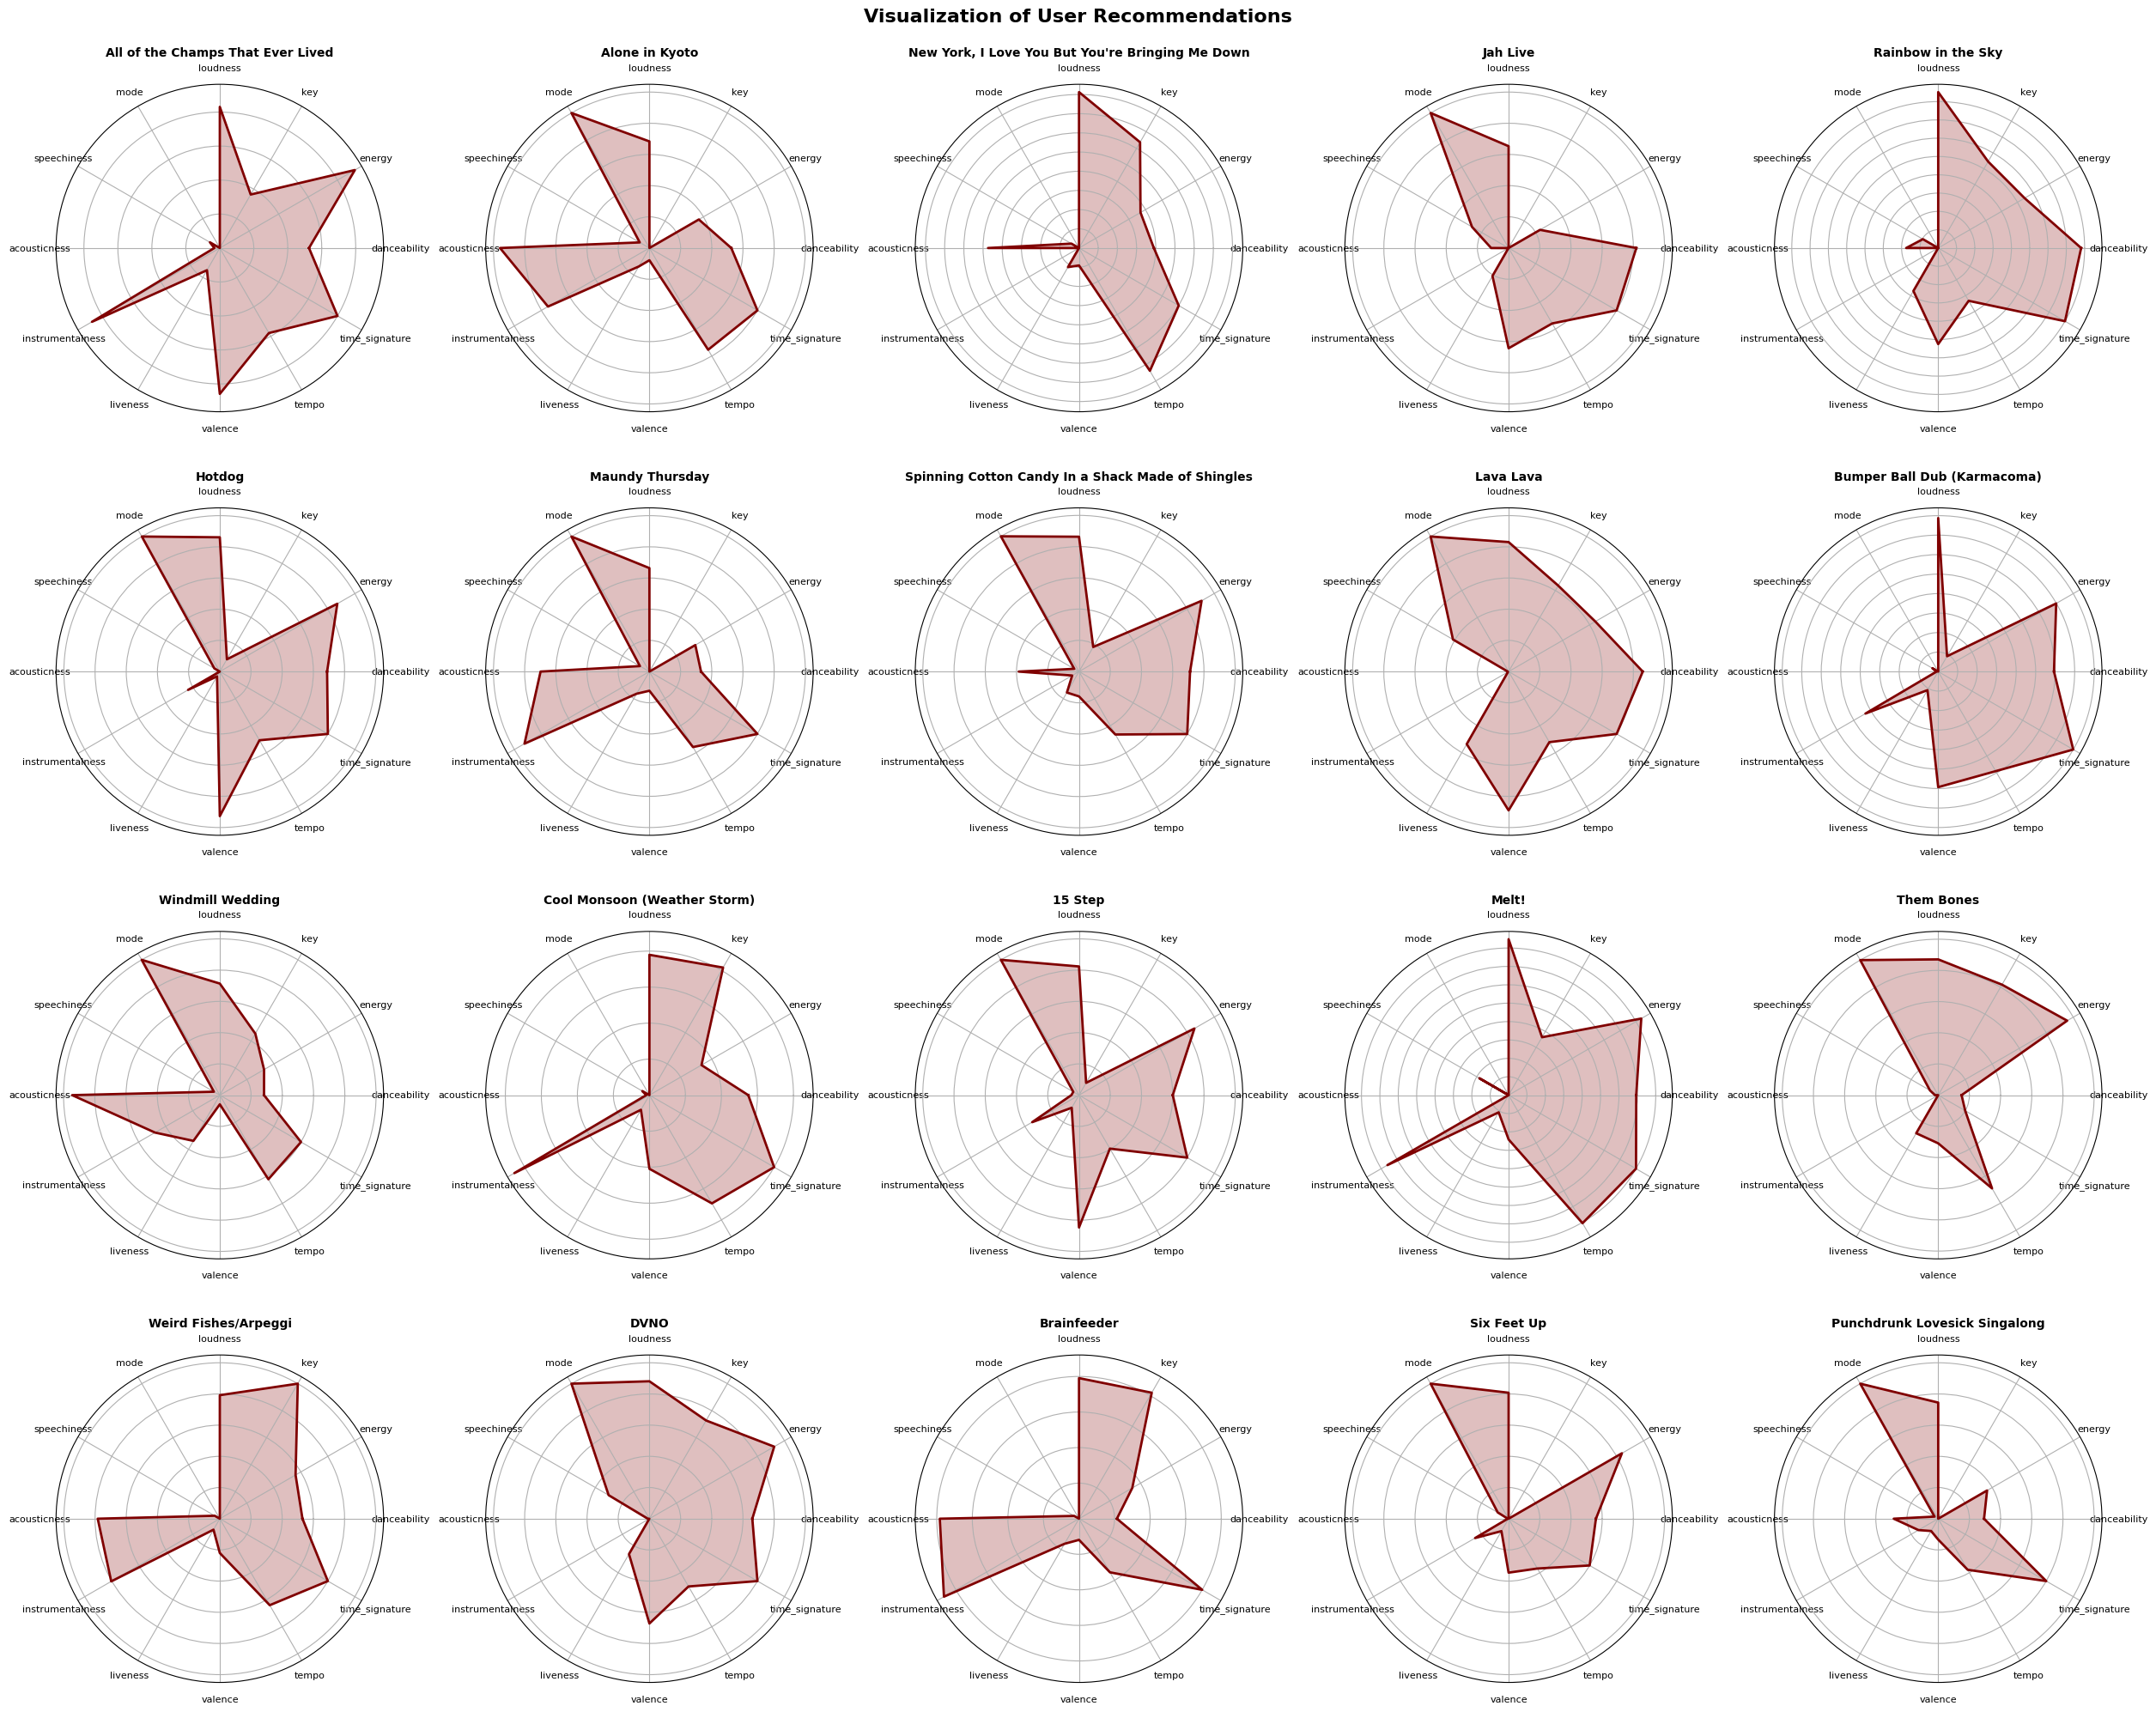

In [564]:
plot_user_recommendation(users=most_listened, features=features)

### **Візуалізація рекомендацій**

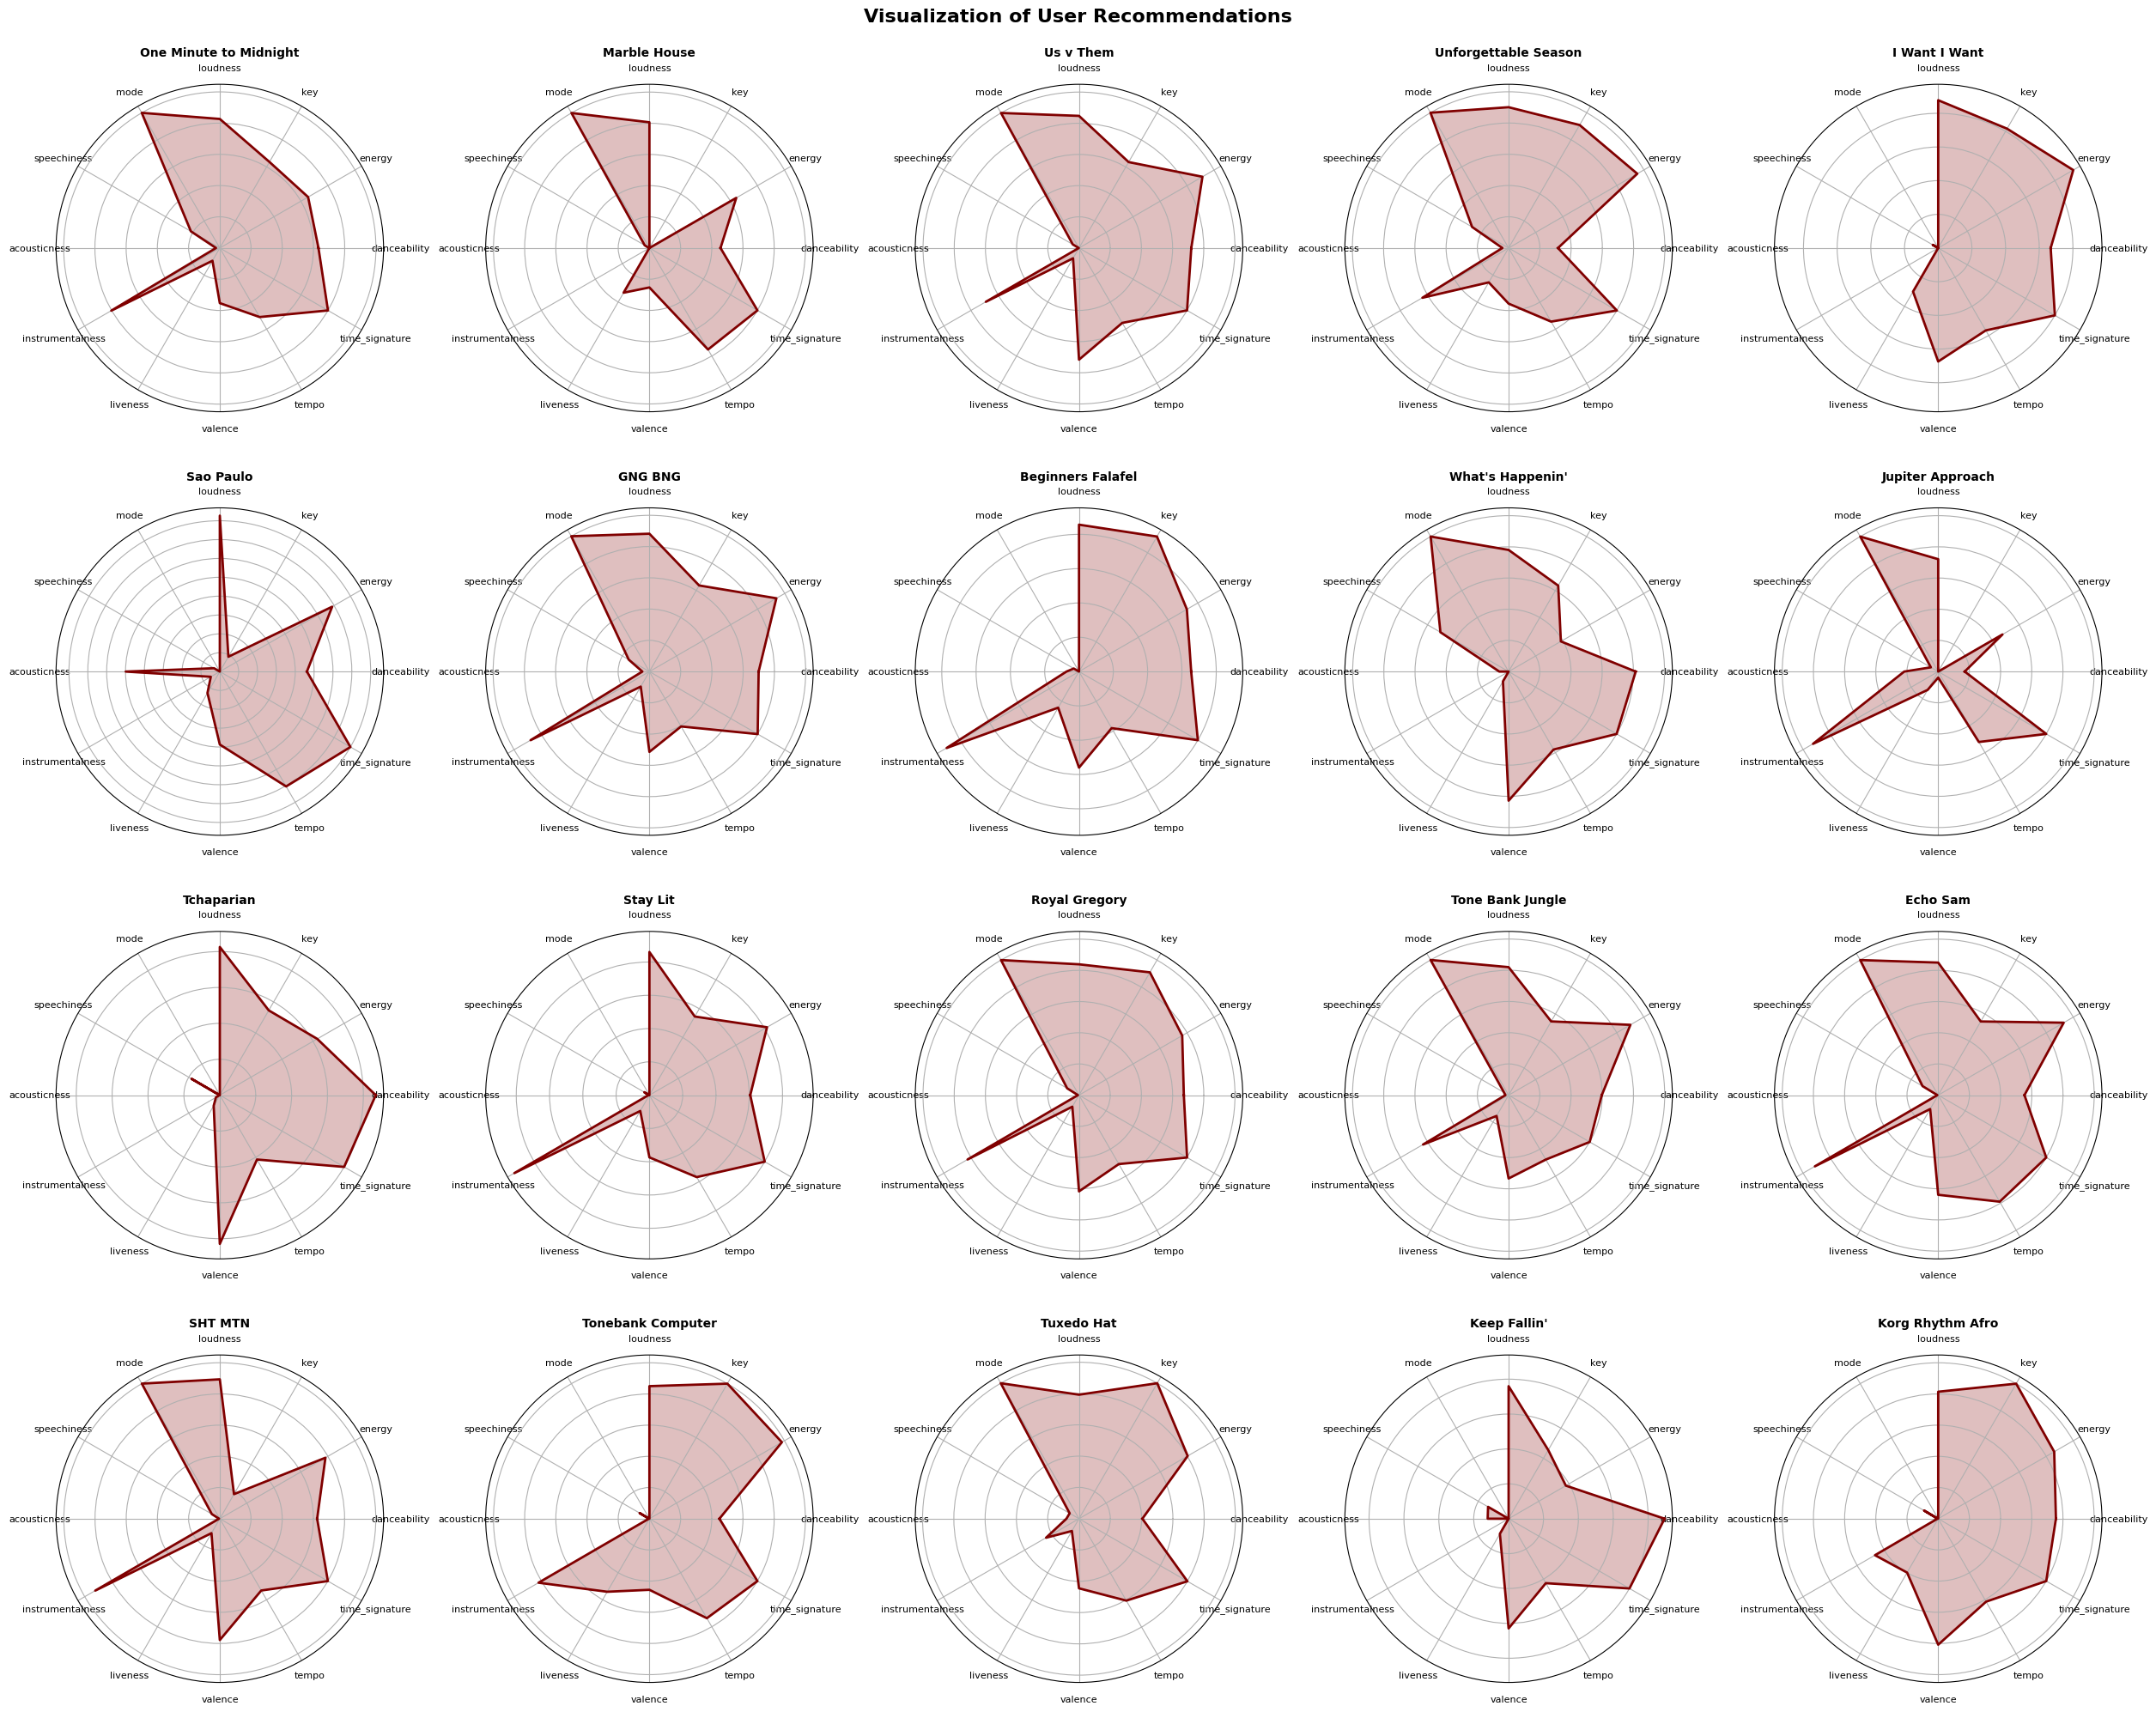

In [544]:
plot_user_recommendation(recommendations, features=features)

# **Відображення профілю цього користувача для порівняння**

In [572]:
user_profile = df_profiles[df_profiles.index == ransom_user]

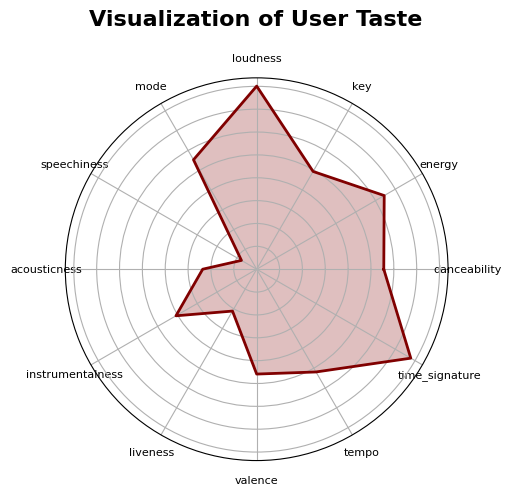

In [566]:
plot_one_user_recommendation(user=df_profiles[df_profiles.index == ransom_user], features=features)

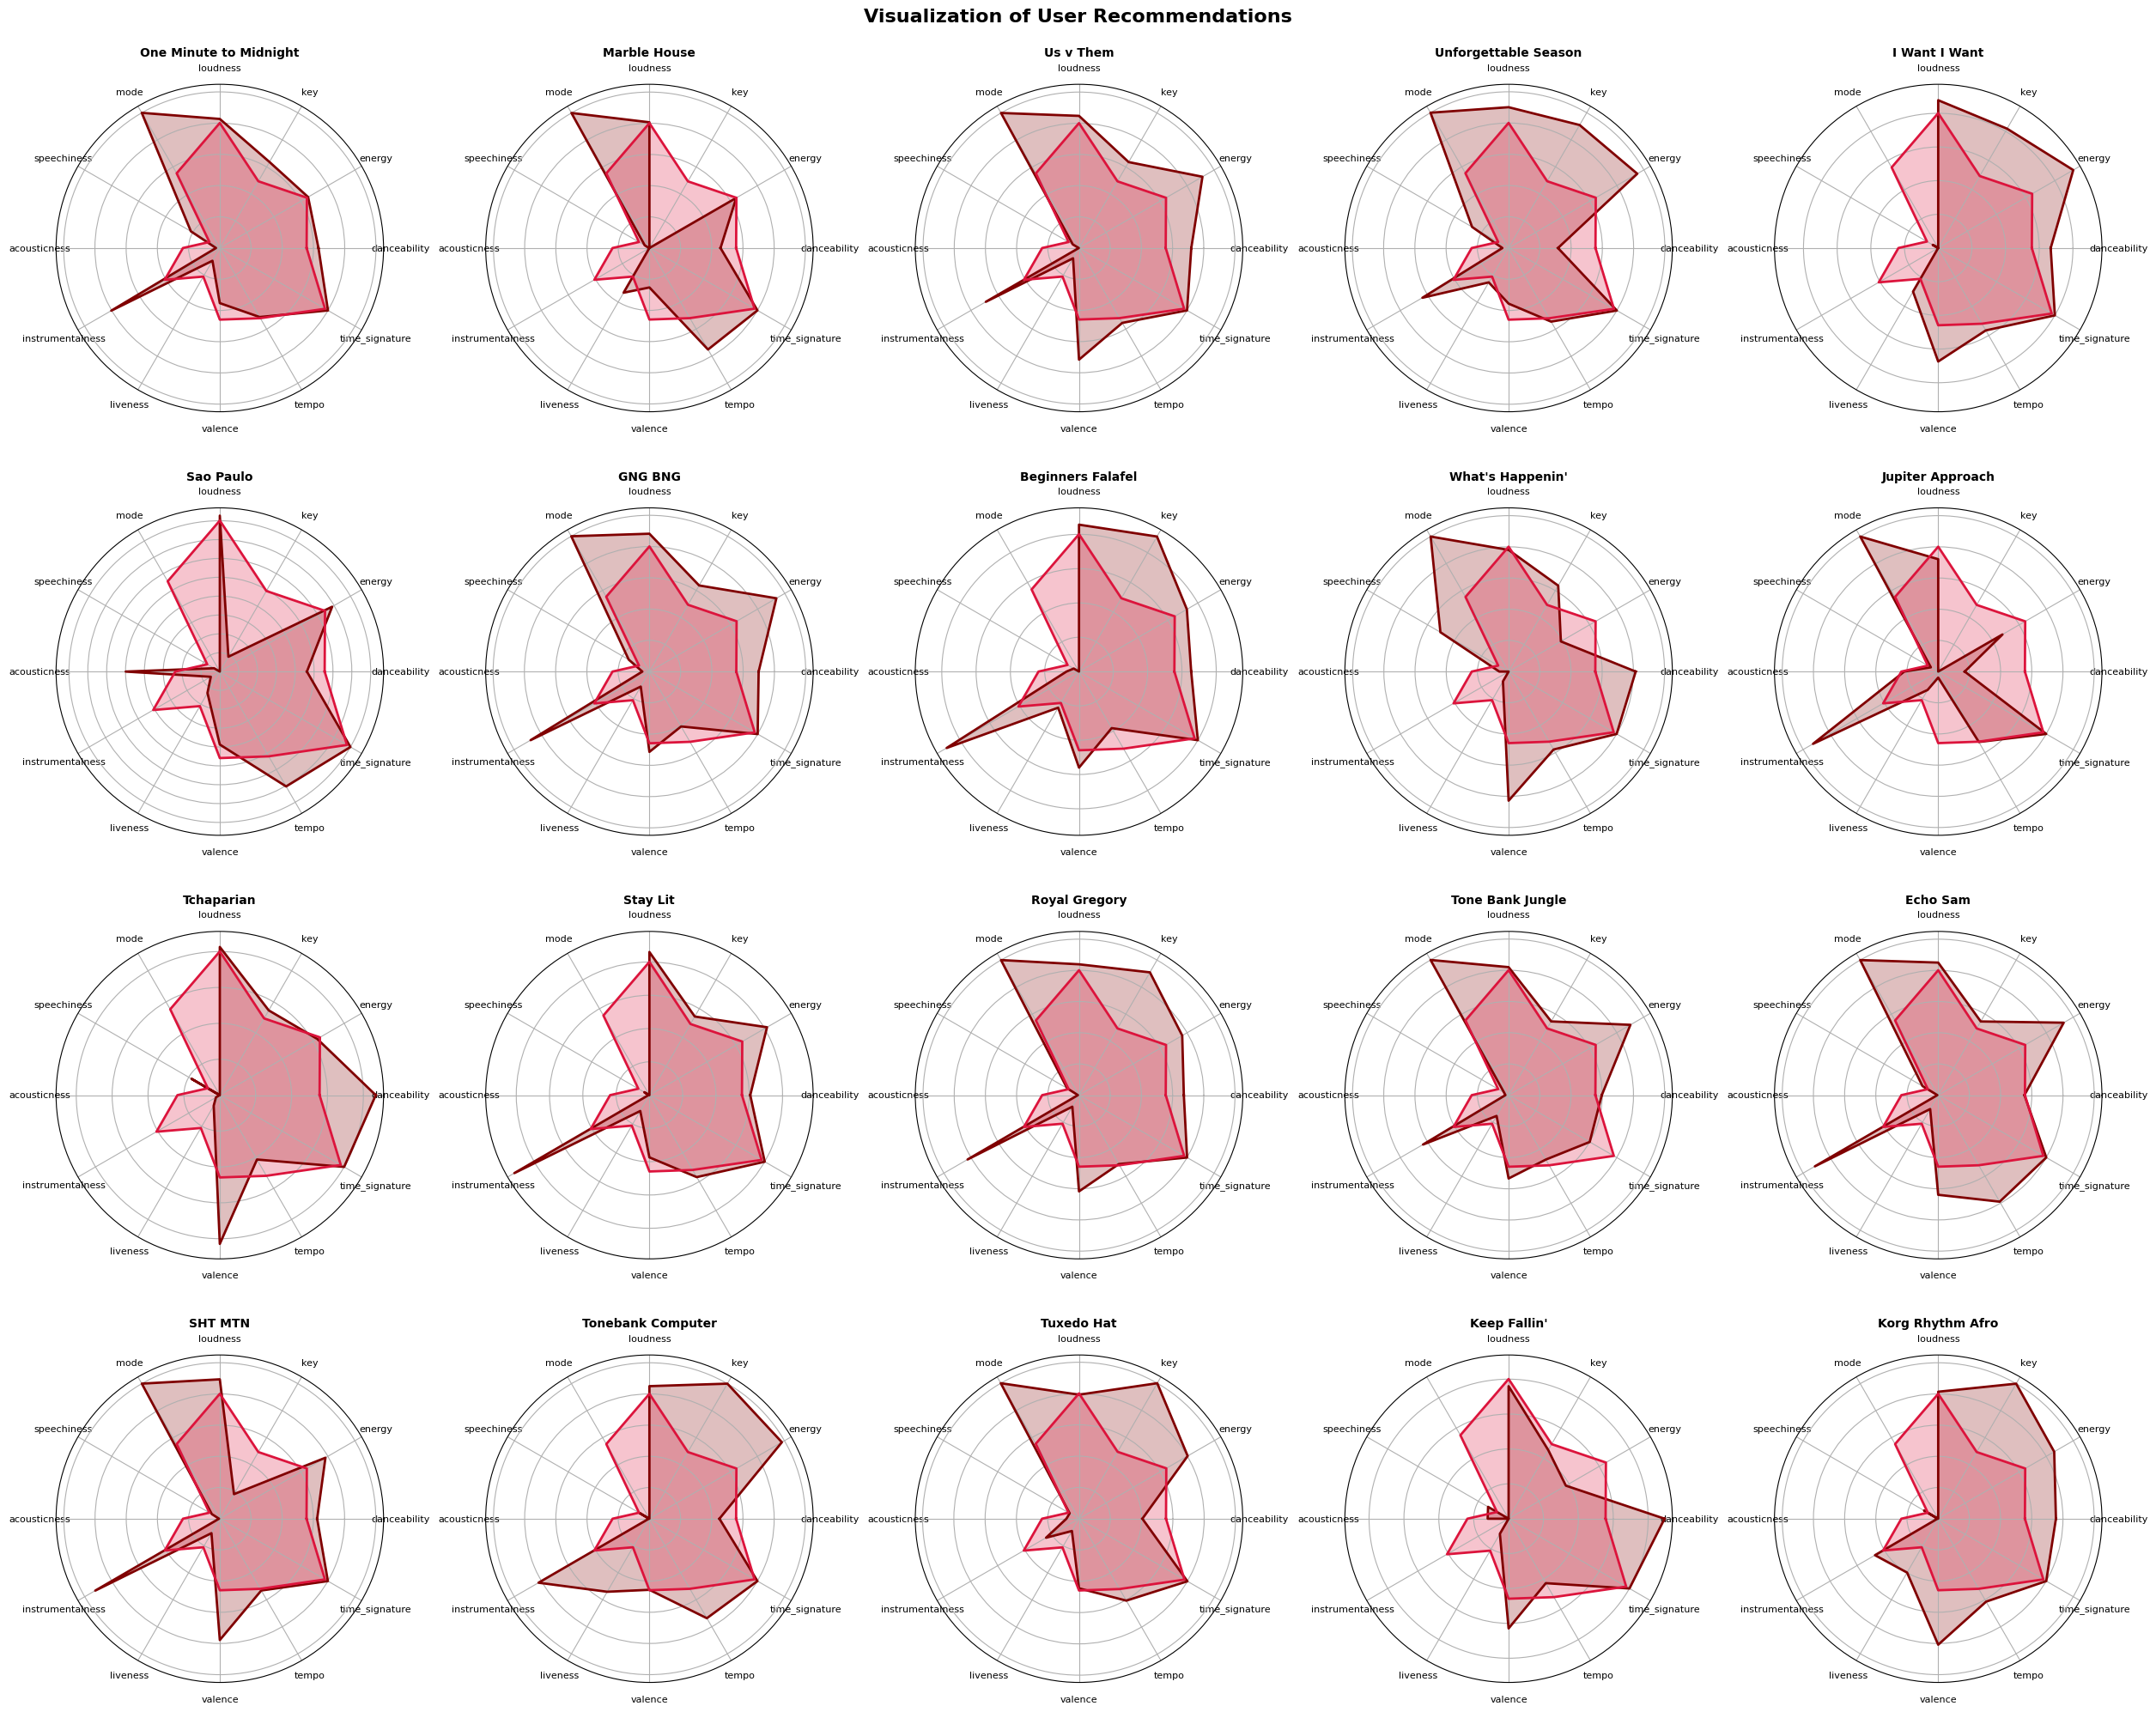

In [568]:
plot_user_recommendation(users=recommendations, features=features, user_profile=df_profiles[df_profiles.index == ransom_user])

# **Вимірювання точності (порівняння рекомендацій з профілем користувача)**

In [570]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

In [582]:
def simmilarity(user_profile, list_of_recs, features):
  recs = []
  df = list_of_recs[features]
  for col in df.columns:
    median = df[col].median()
    recs.append(median)
  return {
      'mae': mean_absolute_error(y_true=user_profile[features].T.values, y_pred=recs),
      'mse': mean_squared_error(y_true=user_profile[features].T.values, y_pred=recs),
      'rmse': root_mean_squared_error(y_true=user_profile[features].T.values, y_pred=recs)
  }

In [583]:
simmilarity(user_profile, recommendations, features)

{'mae': 0.13055998258118048,
 'mse': 0.0318895604906243,
 'rmse': 0.1785764835879134}